## Problem 3.2: Pulsing jellyfish

In Tutorial 3b, we extracted information from movies of pulsing jellyfish. Using these images (which you can download here, analyze both the daytime and nighttime movies. Compare and contrast the measurements both between daytime and nighttime and among the individual jellyfish. Discuss any conclusions or suggestions for further experiments you may have.

This question is intentionally open-ended. Think carefully about what you want to do and how you interpret what you see.

Monitoring of Cassiopea pulsing activity for consecutive days and nights revealed behavioral quiescence at night that is rapidly reversible, as well as a delayed response to stimulation in the quiescent state. When deprived of nighttime quiescence, Cassiopea exhibited decreased activity and reduced responsiveness to a sensory stimulus during the subsequent day, consistent with homeostatic regulation of the quiescent state. 

the relaxation and contraction of the bell causes a corresponding change in average pixel intensity, which was measured for each frame of the recording, producing a pulse trace (Figure 1D). Pulse events were counted using the peak of the pulse trace, and the inter-pulse interval (IPI) was calculated as the time between the peaks (Figure 1D; Figure S2).

We observed that Cassiopea **pulse less at night than during the day** (Figure 2; Data S1). To quantify this difference in pulsing frequency, we tracked the pulsing behavior of 23 jellyfish over six consecutive days and nights (Figure 2C). **We define “activity” as the total number of pulses in the first 20 min of each hour. Although individual jellyfish showed different basal activity levels (Figure 2C), all showed a large decrease in mean activity (∼32%) at night (781 ± 199 pulses/20 min, mean ± SD) compared to the day (1,155 ± 315 pulses/20 min, mean ± SD; Figures 2C and 2E).** To determine whether fast- and slow-pulsing jellyfish change their activity to a similar degree, we **normalized activity of individual jellyfish by their mean day activity**. Despite variations in basal activity, the relative change from day to night was similar between jellyfish (Figure 2D). Jellyfish activity decreased throughout the first 3–6 hr of the night, with the lowest activity occurring 6–12 hr after the day-to-night transition. Pulsing activity peaked upon feeding, occurring on the fourth hour of each day (Figures 2C and 2D). 

In [56]:
import glob
import os

import numpy as np
import pandas as pd
import scipy.signal

# Image processing tools
import skimage
import skimage.io

import bebi103
import altair as alt
import altair_catplot as altcat

import bokeh
bokeh.io.output_notebook()

Loading BokehJS ...

A single jellyfish lives in each box. The boxes are 4 by 4 inches. The jellyfish constantly contract and relax in a pulsing motion.  Our task in this tutorial is to get traces so we can measure pulse frequency.

We have two different data sets, day and night, each contained in their own directory.  Each image they acquired is stored as a TIFF image.  The frame rate was 15 frames per second.

Let's take a look at the structure of the directory with the images.  We will use the `glob` module, which allows us to specify string with wild cards to specify files of interest. Note that you should sort the list returned by `glob.glob()` so you retain the order of the images.

In [2]:
# The directory containing daytime data
data_dir = '../data/cassiopea_pulsation/day/'
data_dir_night = '../data/cassiopea_pulsation/night/'

# Glob string for images
im_glob = os.path.join(data_dir, '*.TIF')
im_glob_night = os.path.join(data_dir_night, '*.TIF')

# Get list of files in directory
im_list = sorted(glob.glob(im_glob))
im_list_night = sorted(glob.glob(im_glob_night))

In [3]:
df_clicks = pd.read_csv('../sandbox/clicks_day.csv', index_col=0)

df_clicks.head()

,x,y
0,347.741897,243.611024
1,500.895485,249.370246


In [4]:
df_clicks_night = pd.read_csv('../sandbox/clicks_night.csv', index_col=0)

df_clicks_night.head()

,x,y
0,349.245860,227.721847
1,502.505283,230.464704


We can use these points to compute the length of a side of a box.

In [8]:
box_length = np.sqrt((df_clicks['x'][1] - df_clicks['x'][0])**2 
                     + (df_clicks['y'][1] - df_clicks['y'][0])**2)

In [9]:
box_length_night = np.sqrt((df_clicks_night['x'][1] - df_clicks_night['x'][0])**2 
                     + (df_clicks_night['y'][1] - df_clicks_night['y'][0])**2)

The interpixel distance is then 4 inches / `box_length`.  We will compute it in centimeters.

In [10]:
interpixel_distance = 4 / box_length * 2.54
interpixel_distance_night = 4 / box_length_night * 2.54

In [11]:
interpixel_distance

0.06629178081856157

In [12]:
interpixel_distance_night

0.06628220994865655

Now that we know the interpixel distance, we can display the image with appropriate scaling of axes.

In [13]:
# Read in the image using skimage
im = skimage.io.imread(im_list[0])
im_night = skimage.io.imread(im_list_night[0])

# Let's get information about the image
print(type(im), im.dtype, im.shape)

<class 'numpy.ndarray'> uint16 (480, 640, 3)


In [14]:
# Just slice the red channel
im = im[:,:,0]
im_night = im_night[:,:,0]

In [15]:
p = bebi103.viz.imshow(im,
                       interpixel_distance=interpixel_distance,
                       length_units='cm')
bokeh.io.show(p)

In [16]:
p = bebi103.viz.imshow(im_night,
                       interpixel_distance=interpixel_distance,
                       length_units='cm')
bokeh.io.show(p)

In [17]:
# def squish_rgb(fname, **kwargs):
#     """
#     Only take one channel. (Need to explicitly have the **kwargs to play
#     nicely with skimage.io.ImageCollection.)
#     """
#     im = skimage.io.imread(fname)
#     return im[:,:,0]

# ic = skimage.io.ImageCollection(im_glob,
#                                 conserve_memory=True, 
#                                 load_func=squish_rgb)

# ic_night = skimage.io.ImageCollection(im_glob_night,
#                                 conserve_memory=True, 
#                                 load_func=squish_rgb)

In [18]:
fps = 15
t = np.arange(0, len(ic)) / fps

In [19]:
df_rois = pd.read_csv('../sandbox/roi_day_2.csv', index_col=0)
df_rois_night = pd.read_csv('../sandbox/roi_night_2.csv', index_col=0)

In [20]:
df_rois.head()

,roi,x,y
0,0,55.343681,219.857143
1,0,151.840355,225.342857
2,0,151.840355,132.085714
3,0,56.762749,132.085714
4,1,210.022173,208.885714


In [21]:
df_rois_night.head()

,roi,x,y
0,0,152.786516,214.814230
1,0,66.223323,209.328516
2,0,66.223323,148.985658
3,0,152.786516,148.985658
4,1,222.320884,191.499944


In [22]:
rois = [bebi103.image.verts_to_roi(g[['x', 'y']].values, *im.shape) 
            for _, g in df_rois.groupby('roi')]

rois_night = [bebi103.image.verts_to_roi(g[['x', 'y']].values, *im_night.shape) 
            for _, g in df_rois_night.groupby('roi')]

Now that we have defined the ROIs, let's look at one of them. I'll use the rightmost one.  We will use a trick where we take a grayscale image, convert it to RGB, and then add more blue in certain regions to highlight.

In [23]:
#Check that there are 8 rois
len(rois)

8

In [24]:
len(rois_night)

8

In [29]:
# Define load_func that only gives region bounding ROI
def load_roi(fname, roi_bbox=None, **kwargs):
    """
    Image loading function to only load ROI.
    """
    if roi_bbox is None:
        return skimage.io.imread(fname)[:,:,0]
    else:
        return skimage.io.imread(fname)[:,:,0][roi_bbox]

# Load image collection
# ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
#                                 load_func=load_roi, roi_bbox=roi_bbox)

# ic_night = skimage.io.ImageCollection(im_glob_night, conserve_memory=True, 
#                                       load_func=load_roi, roi_bbox=roi_bbox)

# # Look at first image
# p = bebi103.viz.imshow(ic[0])
# bokeh.io.show(p)

## Some simple analysis

We are interested in the rate at which the jellyfish pulse.  Since the jellyfish are dark on a black background, we could just watch how the total pixel intensity of our respective ROIs change over time to get the pulsing frequency.  This will not really tell us about the shape of the jellyfish or any fine detail, but it will hopefully be enough to get us an estimate of pulsing frequency.

To be more concrete, our goal is to find the distribution of inter-contraction times.  If the distribution is tightly peaked, we have periodic pulsing and we can estimate a frequency.  Otherwise, we might notice pause events that we can see qualitatively in the movies.

We will analyze the jellyfish in our current ROI.  To start with, we'll just compute the total pixel intensity through time.

In [19]:
# # Set up NumPy array to store total pixel intensity
# total_int = np.empty(len(t))

# # Look through and compute total intensity in the ROI
# for i, im in enumerate(ic):
#     total_int[i] = ic[i][roi_box].sum()

/Users/madelynw/anaconda3/lib/python3.7/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


Since the intensity units are arbitrary, we can let's subtract the mean and rescale the data so they go from -1 to 1.

In [20]:
# total_int -= total_int.mean()
# total_int = 1 + 2 * ((total_int - total_int.max()) 
#                     / (total_int.max() - total_int.min()))

# p = bokeh.plotting.figure(plot_width=650,
#                           plot_height=300,
#                           x_axis_label='time (s)', 
#                           y_axis_label='total intensity')

# p.line(t, total_int, line_width=2, line_join='bevel')

# bokeh.io.show(p)

the relaxation and contraction of the bell causes a corresponding change in average pixel intensity, which was measured for each frame of the recording, producing a pulse trace (Figure 1D). Pulse events were counted using the peak of the pulse trace, and the inter-pulse interval (IPI) was calculated as the time between the peaks (Figure 1D; Figure S2).

We observed that Cassiopea **pulse less at night than during the day** (Figure 2; Data S1). To quantify this difference in pulsing frequency, we tracked the pulsing behavior of 23 jellyfish over six consecutive days and nights (Figure 2C). **We define “activity” as the total number of pulses in the first 20 min of each hour. Although individual jellyfish showed different basal activity levels (Figure 2C), all showed a large decrease in mean activity (∼32%) at night (781 ± 199 pulses/20 min, mean ± SD) compared to the day (1,155 ± 315 pulses/20 min, mean ± SD; Figures 2C and 2E).** To determine whether fast- and slow-pulsing jellyfish change their activity to a similar degree, we **normalized activity of individual jellyfish by their mean day activity**. Despite variations in basal activity, the relative change from day to night was similar between jellyfish (Figure 2D). Jellyfish activity decreased throughout the first 3–6 hr of the night, with the lowest activity occurring 6–12 hr after the day-to-night transition. Pulsing activity peaked upon feeding, occurring on the fourth hour of each day (Figures 2C and 2D). 

Let's try looking at average pixel intensity as well.

In [21]:
# # Set up NumPy array to store total pixel intensity
# avg_int = np.empty(len(t))

# # Look through and compute total intensity in the ROI
# for i, im in enumerate(ic):
#     avg_int[i] = ic[i][roi_box].mean()

In [22]:
# avg_int -= avg_int.mean()
# avg_int = 1 + 2 * ((avg_int - avg_int.max()) 
#                     / (avg_int.max() - avg_int.min()))

In [23]:
# p = bokeh.plotting.figure(plot_width=650,
#                           plot_height=300,
#                           x_axis_label='time (s)', 
#                           y_axis_label='average intensity')

# p.line(t, avg_int, line_width=2, line_join='bevel')

# bokeh.io.show(p)

Now let's calculate the interpulse times. To do this, we need to first calculate where the peaks are.

In [24]:
# # Use the height keyword to make sure peaks are above 0
# peaks = scipy.signal.find_peaks(avg_int, height=0)

In [25]:
# p = bokeh.plotting.figure(plot_width=650,
#                           plot_height=300,
#                           x_axis_label='time (s)', 
#                           y_axis_label='average intensity')

# p.line(t, avg_int, line_width=2, line_join='bevel')
# p.circle(peaks[0]/fps, avg_int[peaks[0]], color='orange')

# bokeh.io.show(p)

In [26]:
# interpulse_times = np.diff(peaks[0])
# avg_interpulse_time = np.mean(interpulse_times)

In [27]:
# avg_interpulse_time

13.36241610738255

Now let's look at the interpulse time for all jellyfishes during the day and the night. To do this let's write a couple functions.

In [26]:
def find_total_intensity(ic, roi_box):
    # Set up NumPy array to store total pixel intensity
    total_int = np.empty(len(t))

    # Look through and compute total intensity in the ROI
    for i, im in enumerate(ic):
        total_int[i] = ic[i][roi_box].sum()
    
    total_int -= total_int.mean()
    total_int = 1 + 2 * ((total_int - total_int.max()) 
                    / (total_int.max() - total_int.min()))
    
    return total_int

In [27]:
def find_average_intensity(ic, roi_box):
    # Set up NumPy array to store total pixel intensity
    avg_int = np.empty(len(t))

    # Look through and compute avg intensity in the ROI
    for i, im in enumerate(ic):
        avg_int[i] = ic[i][roi_box].mean()
    
    avg_int -= avg_int.mean()
    avg_int = 1 + 2 * ((avg_int - avg_int.max()) 
                    / (avg_int.max() - avg_int.min()))
    
    return avg_int

In [28]:
def find_ipis(data):
    peaks = scipy.signal.find_peaks(data, height=0)
    return np.diff(peaks[0])

In [31]:
# let's try to compare the same jellyfish in day and night first

# Day
roi, roi_bbox, roi_box = rois[0]

# Load image collection
ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
                                load_func=load_roi, roi_bbox=roi_bbox)

total_int = find_total_intensity(ic, roi_box)
ipis = find_ipis(total_int)

# Night
roi, roi_bbox, roi_box = rois_night[0]
# Load image collection
ic_night = skimage.io.ImageCollection(im_glob_night, conserve_memory=True, 
                                      load_func=load_roi, roi_bbox=roi_bbox)

total_int_night = find_total_intensity(ic_night, roi_box)
ipis_night = find_ipis(total_int_night)

In [38]:
peaks = scipy.signal.find_peaks(total_int, height=0)

p = bokeh.plotting.figure(plot_width=650,
                          plot_height=300,
                          x_axis_label='time (s)', 
                          y_axis_label='average intensity')

p.line(t, total_int, line_width=2, line_join='bevel')
p.circle(peaks[0]/fps, total_int[peaks[0]], color='orange')

bokeh.io.show(p)

In [43]:
peaks = scipy.signal.find_peaks(total_int_night, height=0, width=1)

p = bokeh.plotting.figure(plot_width=650,
                          plot_height=300,
                          x_axis_label='time (s)', 
                          y_axis_label='average intensity')

p.line(t, total_int_night, line_width=2, line_join='bevel')
p.circle(peaks[0]/fps, total_int_night[peaks[0]], color='orange')

bokeh.io.show(p)

In [61]:
# Now let's plot the ecdfs of the interpulse intervals for jellyfish 1

df_day = pd.DataFrame(ipis, columns={'interpulse_interval'})
df_day['day'] = True

df_night = pd.DataFrame(ipis_night, columns={'interpulse_interval'})
df_night['day'] = False

df_ipis = pd.concat([df_day, df_night])

In [62]:
df_ipis.head()

,interpulse_interval,day
0,13,True
1,12,True
2,12,True
3,12,True
4,13,True


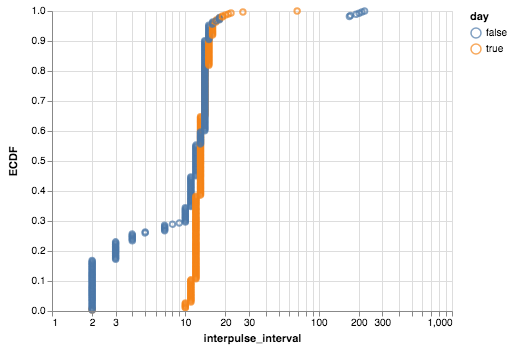

In [63]:
p = altcat.catplot(data=df_ipis,
                   mark='point',
                   encoding=dict(x=alt.X('interpulse_interval:Q', scale=alt.Scale(type='log')),
                                 color=alt.Color('day:N')),
                   transform = 'ecdf')

p

In [21]:
# should we look at other stats like variance? std?
def find_ipi_stats(data):
    peaks = scipy.signal.find_peaks(data, height=0)
    interpulse_times = np.diff(peaks[0])
    return (np.mean(interpulse_times), np.std(interpulse_times))

In [ ]:

# # make a data frame to store all the ipis
# df_ipis = pd.DataFrame(columns={''})
# arr_avg_ipi = np.zeros(8)
# arr_std_ipi = np.zeros(8)

# for i in range(3):
#     roi, roi_bbox, roi_box = rois[i]

#     # Load image collection
#     ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
#                                     load_func=load_roi, roi_bbox=roi_bbox)

#     total_int = find_total_intensity(ic, roi_box)
#     arr_ipis[i] = find_ipis(total_int)
    
#     print(i)
    
# df_tot_int['ipis'] = arr_ipis

In [23]:
df_tot_int = pd.DataFrame(columns={'average_ipi', 'ipi_std'})
arr_avg_ipi = np.zeros(8)
arr_std_ipi = np.zeros(8)

for i in range(1,3):
    roi, roi_bbox, roi_box = rois[i]

    # Load image collection
    ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
                                    load_func=load_roi, roi_bbox=roi_bbox)

    total_int = find_total_intensity(ic, roi_box)
    avg_ipi, std_ipi = find_ipi_stats(total_int)
    arr_avg_ipi[i] = avg_ipi
    arr_std_ipi[i] = std_ipi
    
    print(i)
    
df_tot_int['average_ipi'] = arr_avg_ipi
df_tot_int['ipi_std'] = arr_std_ipi

/Users/madelynw/anaconda3/lib/python3.7/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


1
2


In [25]:
df_tot_int

,average_ipi,ipi_std
0,0.000000,0.000000
1,13.947552,7.163479
2,13.469595,3.584749
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
7,0.000000,0.000000


In [55]:
df_avg_int = pd.DataFrame()

for i in range(len(rois)):
    roi, roi_bbox, roi_box = rois[i]

    # Load image collection
    ic = skimage.io.ImageCollection(im_glob, conserve_memory=True, 
                                    load_func=load_roi, roi_bbox=roi_bbox)

    avg_int = find_average_intensity(ic, roi_box)
    avg_ipi, std_ipi = find_ipi_stats(avg_int)

#     df_avg_int['average_intensity'] = [avg_int]
    df_avg_int['average_ipi'] = avg_ipi
    df_avg_int['ipi_std'] = std_ipi
    
    print(i)

KeyboardInterrupt: 

In [56]:
df_avg_int

""


## Your turn

If you zoom in on the signal, you will see peaks and valleys, corresponding to contractions and relaxations, respectively. Can you extract the interpulse times from this?

Can you do the similar analysis with the night time data set and compare the results to the day?  Can you do it for all eight jellyfish? Can you analyze the time series to get the inter-peak intervals?  What do you observe?  This is actually one of your homework problems.

## Computing environment

In [53]:
%load_ext watermark

In [54]:
%watermark -v -p numpy,scipy,pandas,skimage,bokeh,bebi103,jupyterlab

CPython 3.7.0
IPython 7.0.1

numpy 1.15.2
scipy 1.1.0
pandas 0.23.4
skimage 0.14.0
bokeh 0.13.0
bebi103 0.0.28
jupyterlab 0.35.0
